In [125]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [154]:
dftouse=pd.read_csv("data/finaldata/dftouse.csv")

In [155]:
STANDARDIZABLE = ['num_students', 'num_schools','num_charter_schools','num_pub_schools','tcuresal_percent','pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp','tlocrev_pp','tsrev_pp','tfedrev_pp','tcurinst_pp','tcurssv_pp','tcuroth_pp','tcursalary_pp','tcurbenefits_pp','totalexp_pp','tcapout_pp','tnonelse_pp','tcurelsc_pp','instexp_pp','tcurinst_percent','tcuroth_percent','tcurelsc_percent','tcurssvc_percent','tfedrev_percent','tlocrev_percent','tsrev_percent','r_ELL','r_IEP','r_lunch_free','r_lunch_reduced','r_stud_PKK','r_stud_18','r_stud_912','r_st_PKT','r_st_KT','r_st_ET','r_st_ST','r_st_UT','r_st_TS','r_st_IA','r_st_IC','r_st_EGC','r_st_SGC','r_st_OGC','r_st_TGC','r_st_LMS','r_st_LMSS','r_st_LEA','r_st_LEASS','r_st_SA','r_st_SASS','r_st_SSSS','r_st_OSSS','r_lrev_pt','r_lrev_gst','r_lrev_put','r_lrev_it','r_lrev_aot','r_lrev_pgc','r_lrev_cc','r_lrev_oss','r_lrev_tui','r_lrev_trans','r_lrev_slr','r_lrev_ts','r_lrev_sar','r_lrev_osalserv','r_lrev_sfns','r_lrev_ie','r_lrev_molr','r_lrev_sp','r_lrev_rr','r_lrev_sale','r_lrev_ff','r_lrev_pc','r_srev_gfa','r_srev_sep','r_srev_trans','r_srev_sip','r_srev_cbsp','r_srev_vep','r_srev_codsp','r_srev_bep','r_srev_gt','r_srev_slp','r_srev_aor','r_srev_splea','r_srev_osp','r_srev_ns','r_frev_title1','r_frev_dis','r_frev_cna','r_frev_ems','r_frev_dfs','r_frev_voc','r_frev_ao','r_frev_ns','r_frev_ia','r_frev_be','r_frev_na','r_frev_aofed']
print STANDARDIZABLE

['num_students', 'num_schools', 'num_charter_schools', 'num_pub_schools', 'tcuresal_percent', 'pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp', 'tlocrev_pp', 'tsrev_pp', 'tfedrev_pp', 'tcurinst_pp', 'tcurssv_pp', 'tcuroth_pp', 'tcursalary_pp', 'tcurbenefits_pp', 'totalexp_pp', 'tcapout_pp', 'tnonelse_pp', 'tcurelsc_pp', 'instexp_pp', 'tcurinst_percent', 'tcuroth_percent', 'tcurelsc_percent', 'tcurssvc_percent', 'tfedrev_percent', 'tlocrev_percent', 'tsrev_percent', 'r_ELL', 'r_IEP', 'r_lunch_free', 'r_lunch_reduced', 'r_stud_PKK', 'r_stud_18', 'r_stud_912', 'r_st_PKT', 'r_st_KT', 'r_st_ET', 'r_st_ST', 'r_st_UT', 'r_st_TS', 'r_st_IA', 'r_st_IC', 'r_st_EGC', 'r_st_SGC', 'r_st_OGC', 'r_st_TGC', 'r_st_LMS', 'r_st_LMSS', 'r_st_LEA', 'r_st_LEASS', 'r_st_SA', 'r_st_SASS', 'r_st_SSSS', 'r_st_OSSS', 'r_lrev_pt', 'r_lrev_gst', 'r_lrev_put', 'r_lrev_it', 'r_lrev_aot', 'r_lrev_pgc', 'r_lrev_cc', 'r_lrev_oss', 'r_lrev_tui', 'r_lrev_trans', 'r_lrev_slr', 'r_lrev_ts', 'r_lrev_sar',

In [156]:
INDICATORS = []
for v in dftouse.columns:
    l=np.unique(dftouse[v])
    if len(l) <= 10:
        INDICATORS.append(v)
        
INDICATORS.remove('RESP_High_Graduation')        
INDICATORS.remove('RESP_Low_Graduation')  
print INDICATORS

['i_agency_type_local_school_district', 'i_agency_type_local_school_district_sup_union', 'i_agency_type_regional_education_services', 'i_agency_type_charter_school_agency', 'i_fin_sdlc_sec', 'i_fin_sdlc_elem_sec', 'i_fin_sdlc_voc', 'i_ucl_city_large', 'i_ucl_city_mid', 'i_ucl_city_small', 'i_ucl_suburb_large', 'i_ucl_suburb_mid', 'i_ucl_suburb_small', 'i_ucl_town_fringe', 'i_ucl_town_distant', 'i_ucl_town_remote', 'i_ucl_rural_fringe', 'i_ucl_rural_distant', 'i_ucl_rural_remote', 'i_cs_all_charter', 'i_cs_charter_noncharter', 'i_cs_all_noncharter', 'i_ma_ne_nr', 'i_ma_metropolitan', 'i_ma_micropolitan', 'i_lgo_K', 'i_lgo_PK']


In [157]:
#CITATION: From HW3
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [158]:
#CITATION: From HW3
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [159]:
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP_High_Graduation'].values
#CITATION: From HW3
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [160]:
# make sure we didn't get unlucky in our mask selection
print "% High_Graduation in Training:", np.mean(dftouse['RESP_High_Graduation'][mask])
print "% High_Graduation in Testing:", np.mean(dftouse['RESP_High_Graduation'][~mask])
print "% Low_Graduation in Training:", np.mean(dftouse['RESP_Low_Graduation'][mask])
print "% Low_Graduation in Testing:", np.mean(dftouse['RESP_Low_Graduation'][~mask])

% High_Graduation in Training: 0.248774672142
% High_Graduation in Testing: 0.249690976514
% Low_Graduation in Training: 0.257252616241
% Low_Graduation in Testing: 0.236402966625


In [161]:
#CITATION: From HW3
from sklearn.preprocessing import StandardScaler

for col in STANDARDIZABLE:
    #print col
    valstrain=dftouse[col].values[mask]
    valstest=dftouse[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    dftouse[col]=out

In [162]:
#CITATION: From HW3
lcols=STANDARDIZABLE+INDICATORS
print len(lcols)

130


In [163]:
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP_High_Graduation'].values

In [164]:
#CITATION: From HW3
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [165]:
#CITATION: From HW3
from sklearn.grid_search import GridSearchCV

In [166]:
#CITATION: From HW3
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [167]:
#CITATION: From HW3
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [168]:
#CITATION: From HW3
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [169]:
#CITATION: From HW3
from sklearn.linear_model import LogisticRegression

In [170]:
%%time
clflog,Xtrain,ytrain,Xtest,ytest  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, dftouse, lcols, 'RESP_High_Graduation', 1, mask=mask)
#CITATION: Adapted from HW3

using mask
BEST {'C': 1} 0.792422837462 [mean: 0.75123, std: 0.00023, params: {'C': 0.001}, mean: 0.77454, std: 0.00334, params: {'C': 0.01}, mean: 0.78699, std: 0.00367, params: {'C': 0.1}, mean: 0.79242, std: 0.00484, params: {'C': 1}, mean: 0.79083, std: 0.00403, params: {'C': 10}, mean: 0.79057, std: 0.00437, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.78
[[2253  175]
 [ 525  283]]
########################################################
CPU times: user 2min 52s, sys: 1.2 s, total: 2min 53s
Wall time: 2min 56s


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [171]:
#CITATION: From HW3
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

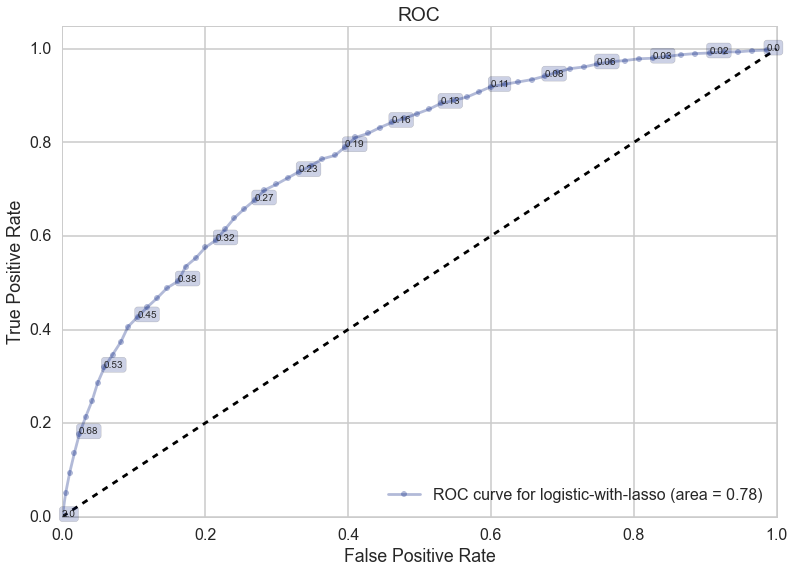

In [172]:
#CITATION: From HW3
with sns.color_palette("dark"):
    ax=make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=200, skip=50)

In [173]:
#CITATION: From HW3
lasso_importances=nonzero_lasso(clflog)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

,abscoef,coef
feature,,
i_lgo_K,2.577887,2.577887
i_lgo_PK,2.445071,2.445071
i_fin_sdlc_sec,1.348039,-1.348039
r_st_TS,1.076354,-1.076354
num_schools,1.038473,-1.038473
tcurbenefits_pp,0.908836,-0.908836
r_frev_ao,0.809012,0.809012
r_frev_dis,0.774889,0.774889
r_stud_912,0.731449,0.731449


In [174]:
#CITATION: From HW3
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['RESP_High_Graduation'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
r_lunch_free,0.293478,-0.293478
r_stud_912,0.214740,0.214740
r_stud_18,0.207635,-0.207635
tlocrev_percent,0.206009,0.206009
tfedrev_percent,0.190742,-0.190742
tlocrev_pp,0.178187,0.178187
r_frev_dis,0.169788,0.169788
r_frev_title1,0.168795,-0.168795
tsrev_percent,0.159817,-0.159817


Low

In [175]:
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP_Low_Graduation'].values

In [176]:
%%time
clflog,_,_,_,_  = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, dftouse, lcols, 'RESP_Low_Graduation', 1, mask=mask)
#CITATION: Adapted from HW3

using mask
BEST {'C': 10} 0.80818651477 [mean: 0.74275, std: 0.00016, params: {'C': 0.001}, mean: 0.79295, std: 0.00596, params: {'C': 0.01}, mean: 0.80739, std: 0.00811, params: {'C': 0.1}, mean: 0.80686, std: 0.00911, params: {'C': 1}, mean: 0.80819, std: 0.01012, params: {'C': 10}, mean: 0.80805, std: 0.00989, params: {'C': 100}]
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.82
[[2275  196]
 [ 394  371]]
########################################################
CPU times: user 2min 52s, sys: 1.61 s, total: 2min 54s
Wall time: 2min 59s


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


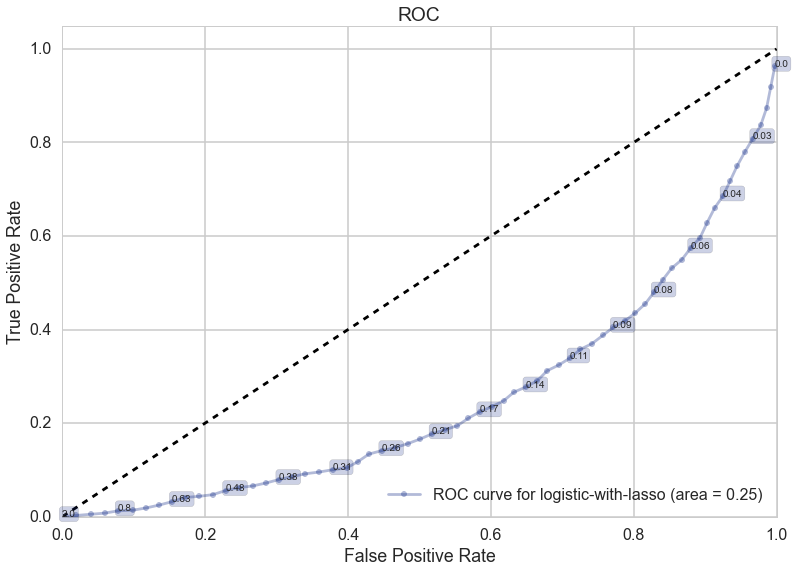

In [177]:
with sns.color_palette("dark"):
    ax=make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=200, skip=50)

In [178]:
#CITATION: From HW3
lasso_importances=nonzero_lasso(clflog)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

,abscoef,coef
feature,,
i_lgo_K,3.099082,-3.099082
i_lgo_PK,3.097610,-3.097610
r_st_TS,1.838395,1.838395
i_fin_sdlc_voc,1.576042,1.576042
totalexp_pp,1.306304,1.306304
r_stud_912,0.856672,-0.856672
r_frev_ao,0.780400,-0.780400
i_ma_metropolitan,0.778464,0.778464
i_ucl_city_small,0.740225,0.740225


In [147]:
#High - Lasso
[['i_agency_type_regional_education_services', 'i_lgo_PK', 'i_lgo_K', 'num_schools', 'i_fin_sdlc_sec', 'r_frev_ao', 'r_frev_dis', 'totalexp_pp', 'r_stud_reg_12_W_M', 'r_stud_reg_12_W_F']]

[['r_lunch_free',
  'r_stud_reg_12_W_F',
  'r_stud_reg_12_W_M',
  'tlocrev_percent',
  'r_stud_912',
  'r_stud_18',
  'tfedrev_percent',
  'tlocrev_pp',
  'r_stud_re_W',
  'tsrev_percent']]

In [ ]:
#Low - Lasso
[['i_fin_sdlc_elem_sec', 'i_fin_sdlc_voc', 'r_stud_reg_12_W_F', 'i_lgo_PK', 'r_stud_reg_12_W_M', 'i_lgo_K', 'i_agency_type_local_school_district', 'r_frev_ao', 'r_stud_re_B', 'r_stud_912']]

In [ ]:
#Top - No Gender/Ethnicity
[['i_lgo_K', 'i_lgo_PK', 'i_fin_sdlc_sec', 'r_st_IA', 'num_schools', 'r_IEP', 'totalexp_pp', 'tcurbenefits_pp', 'r_stud_912', 'tfedrev_percent']]

In [ ]:
#Bottom - No Gender/Ethnicity
[['Agency ID - NCES Assigned [District] Latest available year', 'i_lgo_K', 'i_lgo_PK', 'r_st_TS', 'i_fin_sdlc_voc', 'Total Expenditures (TOTALEXP) per Pupil (V33) [District Finance] 2009-10', 'r_stud_912', 'r_frev_ao', 'i_ma_metropolitan', 'i_ucl_city_small', 'i_ma_micropolitan']]